In [28]:
import sys
import os
from pathlib import Path

PROJ_NAME = "optimal-stopping"

# Locate the Project directory
curr_dir = str(Path.cwd())
start = curr_dir.find(PROJ_NAME)
if start < 0:
    print("ERROR: Project directory not found")
    print("Make sure you have the correct project structure")
    print("and run the simulation from within the project")
proj_pathname = curr_dir[:(start+len(PROJ_NAME))]

# Create path to the project directory
proj_path = Path(proj_pathname)

# Add the project folder to PATH
sys.path.append(proj_pathname)

In [29]:
import os
from pathlib import Path
import numpy as np
from scipy import stats
from bin.result_processing import loadFile
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

plt.rc('font', size = 18)
results_path = Path(proj_path/"results/raw_data")
files = os.listdir(results_path)

===For Dataset 1 using SVR with an RBF kernel===
Sensor name R5 WAITING
One-way ANOVA
F value: 56.59395430362563
P value: 1.48e-32 <= 0.05
=> Reject H0



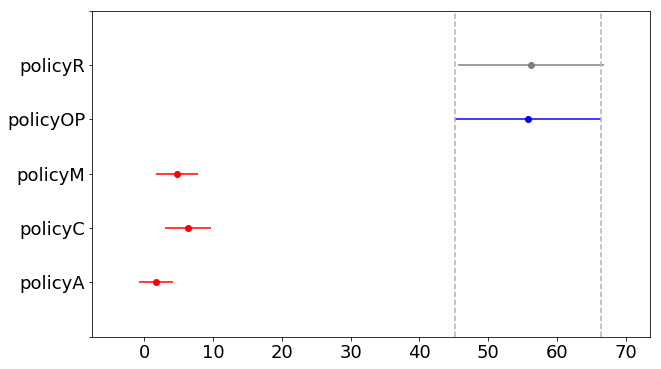

Sensor name R3 WAITING
One-way ANOVA
F value: 26.48548936317204
P value: 9.20e-18 <= 0.05
=> Reject H0



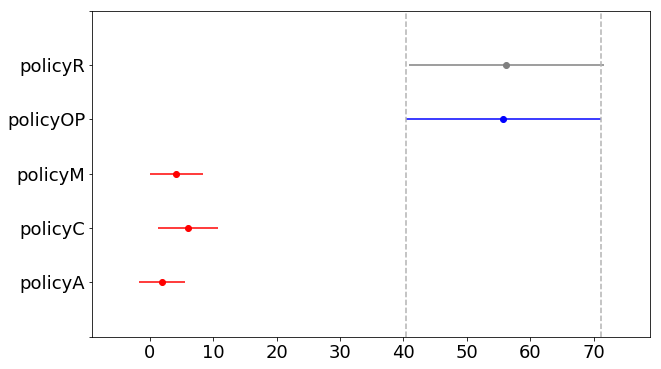

In [63]:
d1_data = {}


for filename in files:
    if filename[:12]=='waiting_time':
        with open(results_path/filename,"rb") as f:
            dataset, result = loadFile(f)
            if result.policyName == 'policyOST':
                if dataset == 1:
                    if result.sensor_name not in d1_data:
                        d1_data[result.sensor_name] = []
                    data = [('policyOP', wt) for wt in result.waiting_time]
                    d1_data[result.sensor_name] += data
            elif result.policyName != 'policyE' and result.policyName != 'policyN':
                if dataset == 1:
                    if result.sensor_name not in d1_data:
                        d1_data[result.sensor_name] = []
                    data = [(result.policyName, wt) for wt in result.waiting_time]
                    d1_data[result.sensor_name] += data

print("===For Dataset 1 using SVR with an RBF kernel===")
for sensor_name in d1_data:
    print("Sensor name", sensor_name, "WAITING")
    data = np.rec.array(d1_data[sensor_name], dtype = [('Policy','|U10'),('Waiting', '<i8')])
    f, p = stats.f_oneway(data[data['Policy'] == 'policyA'].Waiting,
                          data[data['Policy'] == 'policyC'].Waiting,
                          data[data['Policy'] == 'policyM'].Waiting,
                          data[data['Policy'] == 'policyR'].Waiting,
                          data[data['Policy'] == 'policyOP'].Waiting)
     
    print ('One-way ANOVA')
     
    print ('F value:', f)
    if p <= 0.05:
        print ('P value: {:.2e} <= 0.05'.format(p))
        print("=> Reject H0\n")
    else:
        print ('P value: {:.2e} > 0.05'.format(p))
        print("=> Fail to reject H0\n")

    '''
    Perform Tukey T-Test
    '''

    mc = MultiComparison(data['Waiting'], data['Policy'])
    result = mc.tukeyhsd(alpha=0.05)
#     with open('results/svr_rbf_'+sensor_name+'_waiting_plot_diff_means.txt', 'w') as f:
#         f.write(str(result.summary()))
     
    fig, ax = plt.subplots()
    result.plot_simultaneous(comparison_name='policyOP', ax=ax)
    plt.title('')
    plt.show()
#     plt.savefig('results/svr_rbf_'+sensor_name+'_waiting_plot_diff_means'+'.png')
print("================================================")



===For Dataset 2 using Linear Regression===
Sensor name pi4 WAITING
19
19
One-way ANOVA
F value: 19.86841707842224
P value: 7.892553014202059e-14 <= 0.05
=> Reject H0



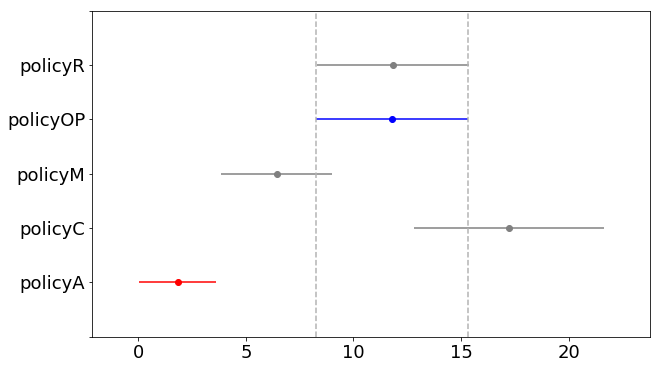

Sensor name pi3 WAITING
14
14
One-way ANOVA
F value: 51.082984055978635
P value: 1.2483606116074772e-30 <= 0.05
=> Reject H0



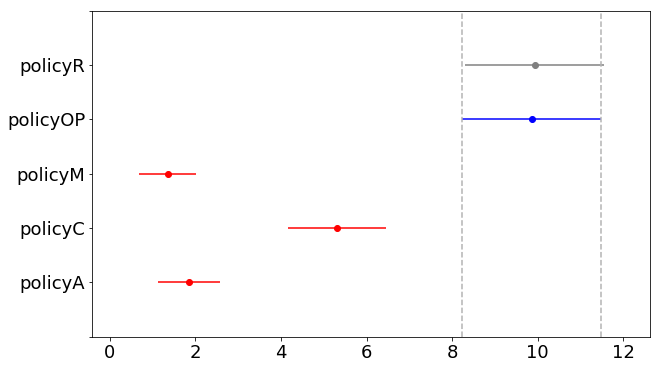

In [40]:
d2_data = {}

for filename in files:
    if filename[:12]=='waiting_time':
        with open(results_path/filename,"rb") as f:
            dataset, result = loadFile(f)
            if result.policyName == 'policyOST':
                if dataset == 2:
                    if result.sensor_name not in d2_data:
                        d2_data[result.sensor_name] = []
                    data = [("policyOP", wt) for wt in result.waiting_time]
                    d2_data[result.sensor_name] += data
            elif result.policyName != 'policyE' and result.policyName != 'policyN':
                if dataset == 2:
                    if result.sensor_name not in d2_data:
                        d2_data[result.sensor_name] = []
                    data = [(result.policyName, wt) for wt in result.waiting_time]
                    d2_data[result.sensor_name] += data

print("\n\n===For Dataset 2 using Linear Regression===")
for sensor_name in d2_data:
    print("Sensor name", sensor_name, "WAITING")
    data = np.rec.array(d2_data[sensor_name], dtype = [('Policy','|U10'),('Waiting', '<i8')])
    print(len(data[data['Policy'] == 'policyOP'].Waiting))
    print(len(data[data['Policy'] == 'policyR'].Waiting))
    f, p = stats.f_oneway(data[data['Policy'] == 'policyA'].Waiting,
                          data[data['Policy'] == 'policyC'].Waiting,
                          data[data['Policy'] == 'policyM'].Waiting,
                          data[data['Policy'] == 'policyR'].Waiting,
                          data[data['Policy'] == 'policyOP'].Waiting)
     
    print ('One-way ANOVA')
     
    print ('F value:', f)
    if p <= 0.05:
        print ('P value: {} <= 0.05'.format(p))
        print("=> Reject H0\n")
    else:
        print ('P value: {} > 0.05'.format(p))
        print("=> Fail to reject H0\n")

    '''
    Perform Tukey T-Test
    '''

    mc = MultiComparison(data['Waiting'], data['Policy'])
    result = mc.tukeyhsd(alpha=0.05)
#     with open('results/lin_reg_'+sensor_name+'_waiting_plot_diff_means.txt', 'w') as f:
#         f.write(str(result.summary()))
     
    fig, ax = plt.subplots()
    result.plot_simultaneous(comparison_name='policyOP', ax=ax)
    plt.title('')
    plt.rc('font', size = 18)
    plt.show()
#     plt.savefig('results/lin_reg_'+sensor_name+'_waiting_plot_diff_means'+'.png')
print("\n\n===========================================")


===For Dataset 1 using SVR with an RBF kernel===
R3 ERROR
0
224
One-way ANOVA
F value: 23.762936407770074
P value: 6.003e-23 <= 0.05
=> Reject H0



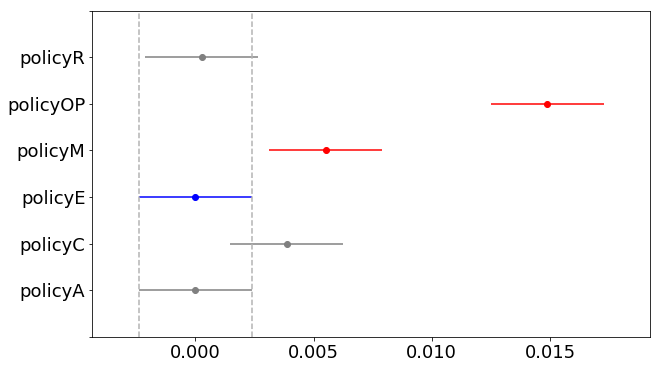

R5 ERROR
0
224
One-way ANOVA
F value: 12.319305507117196
P value: 1.062e-11 <= 0.05
=> Reject H0



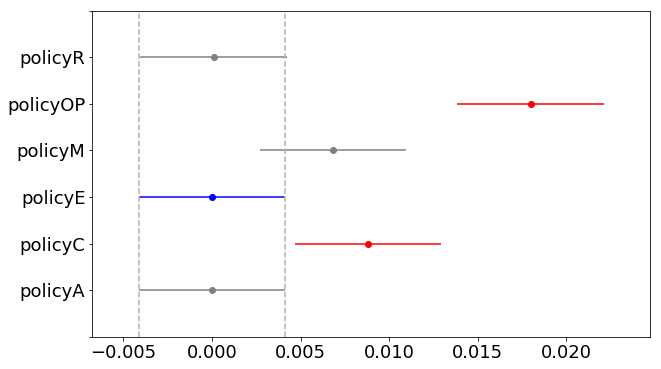

In [61]:
d1_data = {}

for filename in files:
	if filename[:7]=='results':
		with open(results_path/filename,"rb") as f:
			dataset, result = loadFile(f)
			if result.policyName == 'policyOST':
				if dataset == 1:
					if result.sensor_name not in d1_data:
						d1_data[result.sensor_name] = []
					data = [('policyOP', err) for err in result.err_diff]
					d1_data[result.sensor_name] += data
			elif result.policyName != 'policyN':
				if dataset == 1:
					if result.sensor_name not in d1_data:
						d1_data[result.sensor_name] = []
					data = [(result.policyName, err) for err in result.err_diff]
					d1_data[result.sensor_name] += data


print("===For Dataset 1 using SVR with an RBF kernel===")
for sensor_name in d1_data:
	print(sensor_name, "ERROR")
	data = np.rec.array(d1_data[sensor_name], dtype = [('Policy','|U10'),('ErrorDiff', '<f8')])
	print(len(data[data['Policy'] == 'policyOST'].ErrorDiff))
	print(len(data[data['Policy'] == 'policyR'].ErrorDiff))
	f, p = stats.f_oneway(data[data['Policy'] == 'policyC'].ErrorDiff,
	                      data[data['Policy'] == 'policyOP'].ErrorDiff,
	                      data[data['Policy'] == 'policyA'].ErrorDiff,
	                      data[data['Policy'] == 'policyR'].ErrorDiff,
	                      data[data['Policy'] == 'policyM'].ErrorDiff,
	                      data[data['Policy'] == 'policyE'].ErrorDiff)
	 
	print ('One-way ANOVA')
	 
	print ('F value:', f)
	if p <= 0.05:
		print ('P value: {:.3e} <= 0.05'.format(p))
		print("=> Reject H0\n")
	else:
		print ('P value: {:.3e} > 0.05'.format(p))
		print("=> Fail to reject H0\n")

	'''
	Perform Tukey T-Test
	'''

	mc = MultiComparison(data['ErrorDiff'], data['Policy'])
	result = mc.tukeyhsd(alpha=0.05)
# 	with open('results/svr_rbf_'+sensor_name+'_error_plot_diff_means.txt', 'w') as f:
# 		f.write(str(result.summary()))
	 
	result.plot_simultaneous(comparison_name='policyE')
	plt.title('')
	plt.show()
# 	plt.savefig('results/svr_rbf_'+sensor_name+'_error_plot_diff_means'+'.png')
print("================================================")



===For Dataset 2 using Linear Regression===
pi3 ERROR
One-way ANOVA
F value: 14.498783896180536
P value: 1.2436387993444255e-13 <= 0.05
=> Reject H0



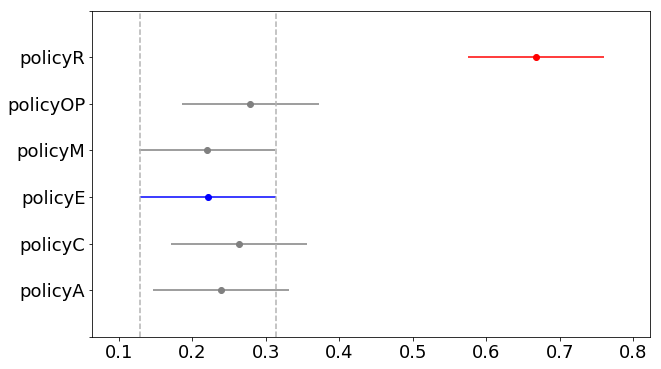

pi4 ERROR
One-way ANOVA
F value: 17.980425474877144
P value: 2.7228117694830134e-17 <= 0.05
=> Reject H0



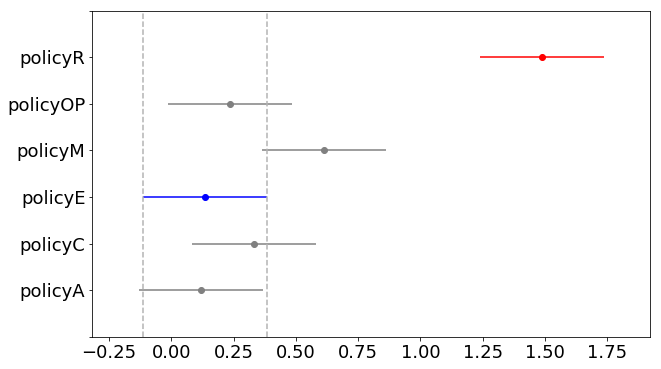

In [42]:
d2_data = {}

for filename in files:
	if filename[:7]=='results':
		with open(results_path/filename,"rb") as f:
			dataset, result = loadFile(f)
			if result.policyName == 'policyOST':
				if dataset == 2:
					if result.sensor_name not in d2_data:
						d2_data[result.sensor_name] = []
					data = [('policyOP', err) for err in result.err_diff]
					d2_data[result.sensor_name] += data
			elif result.policyName != 'policyN':
				if dataset == 2:
					if result.sensor_name not in d2_data:
						d2_data[result.sensor_name] = []
					data = [(result.policyName, err) for err in result.err_diff]
					d2_data[result.sensor_name] += data

print("\n\n===For Dataset 2 using Linear Regression===")
for sensor_name in d2_data:
	print(sensor_name, "ERROR")
	data = np.rec.array(d2_data[sensor_name], dtype = [('Policy','|U10'),('ErrorDiff', '<f8')])
	f, p = stats.f_oneway(data[data['Policy'] == 'policyC'].ErrorDiff,
	                      data[data['Policy'] == 'policyOP'].ErrorDiff,
	                      data[data['Policy'] == 'policyA'].ErrorDiff,
	                      data[data['Policy'] == 'policyR'].ErrorDiff,
	                      data[data['Policy'] == 'policyM'].ErrorDiff,
	                      data[data['Policy'] == 'policyE'].ErrorDiff)
	 
	print ('One-way ANOVA')
	 
	print ('F value:', f)
	if p <= 0.05:
		print ('P value: {} <= 0.05'.format(p))
		print("=> Reject H0\n")
	else:
		print ('P value: {} > 0.05'.format(p))
		print("=> Fail to reject H0\n")

	'''
	Perform Tukey T-Test
	'''

	mc = MultiComparison(data['ErrorDiff'], data['Policy'])
	result = mc.tukeyhsd(alpha=0.05)
# 	with open('results/lin_reg_'+sensor_name+'_error_plot_diff_means.txt', 'w') as f:
# 		f.write(str(result.summary()))
	 
	result.plot_simultaneous(comparison_name='policyE')
	plt.title('')
	plt.rc('font', size = 18)
	plt.show()
# 	plt.savefig('results/lin_reg_'+sensor_name+'_error_plot_diff_means'+'.png')
print("\n\n===========================================")